# Pre-Processing Pipeline

In [100]:
# import required libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
pd.options.plotting.backend = "plotly"
plt.pl

In [14]:
# import raw data
raw_data_folder = os.path.join(os.path.dirname(os.getcwd()), 'Data', 'Raw Data')
rdata_files = os.listdir(raw_data_folder)
# currently reading only one data file
rdata_path = os.path.join(raw_data_folder, rdata_files[1])

"""
TODO once pipeline confirmed use for loop to replicate signal processinjg pipeline to all raw data files using
for rdata in rdata_files:
    rdata_path = os.path.join(raw_data_folder),rdata)
"""

'\nTODO once pipeline confirmed use for loop to replicate signal processinjg pipeline to all raw data files using\nfor rdata in rdata_files:\n    rdata_path = os.path.join(raw_data_folder),rdata)\n'

In [112]:
# read data
info = pd.read_csv(rdata_path, nrows=3)
n_channels = int(info.iloc[0][0].split('=')[1])
srate = int(info.iloc[1][0].split('=')[1][:-2])
board = info.iloc[2][0].split('=')[1]
print(board + ' is used with ' + str(n_channels) + ' EEG channels and a sampling rate of ' + str(srate) + 'Hz.')
rdata = pd.read_csv(rdata_path, skiprows = 4, usecols=[' EXG Channel '+ str(i) for i in range(n_channels)] )
rdata.drop(0, inplace = True)
rdata.insert(0,"Timestamp (s)", [i/srate for i in range(len(rdata))])

 OpenBCI_GUI$BoardCytonSerial is used with 8 EEG channels and a sampling rate of 250Hz.


In [113]:
rdata

Timestamp (s)   EXG Channel 0   EXG Channel 1   EXG Channel 2  \
1              0.000   -66907.913018   -22481.876312    70305.847562   
2              0.004   -66941.485338   -22478.165922    70296.526885   
3              0.008   -66973.180112   -22465.604242    70300.170219   
4              0.012   -67019.537630   -22472.935614    70283.406411   
5              0.016   -67042.157595   -22472.242710    70283.607576   
...              ...             ...             ...             ...   
14199         56.792   -60491.330682   -20293.461715    67781.665061   
14200         56.796   -60511.089624   -20294.914579    67782.469724   
14201         56.800   -60528.501633   -20294.333433    67781.620357   
14202         56.804   -60545.712476   -20301.798916    67778.379354   
14203         56.808   -60558.520026   -20305.129326    67777.999375   

        EXG Channel 3   EXG Channel 4   EXG Channel 5   EXG Channel 6  \
1       -19434.707693    -4664.071460   -20111.563219   -16705.336178   
2       -19431.019656    -4669.905266   -20099.180353   -16689.801716   
3       -19420.044949    -4665.032585   -20079.443762   -16667.941710   
4       -19429.231516    -4680.589399   -20084.428201   -16668.701669   
5       -19427.063397    -4689.150118   -20084.919940   -16663.538416   
...               ...             ...             ...             ...   
14199   -26308.025576   -10575.414965   -18158.847768   -12721.674171   
14200   -26312.630035   -10577.784250   -18162.580509   -12724.825767   
14201   -26312.004186   -10576.487848   -18158.132512   -12722.232964   
14202   -26320.743718   -10585.428546   -18166.402658   -12729.653743   
14203   -26324.789384   -10590.234171   -18169.643661   -12730.257241   

        EXG Channel 7  
1       -84410.379459  
2       -84391.402828  
3       -84366.637095  
4       -84365.318342  
5       -84359.685702  
...               ...  
14199   -70408.263255  
14200   -70402.988243  
14201   -70389.912473  
14202   -70391.074764  
14203   -70388.996051  

[14203 rows x 9 columns]

In [115]:
rdata.plot(x = 'Timestamp (s)',y = [' EXG Channel '+ str(i) for i in range(n_channels)], kind = 'line')

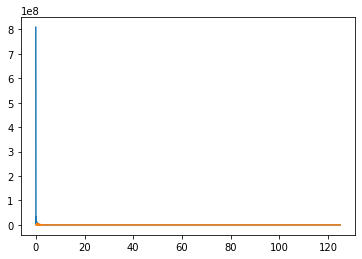

In [145]:
# denoising EEG
fft = np.fft.fft(rdata[' EXG Channel 0'])[0:int(len(rdata)/2)]
freq = np.fft.fftfreq(len(rdata))*srate
freq = freq[0:int(len(rdata)/2)]
plt.plot(freq, abs(fft))

# notch filter powerline
for p in [50,60]:
    for i in range(len(fft)): 
        if abs(freq[i])%p == 0:
            fft[i] = 0

# bpass filter
f_thresh = [0.5,100]
for i in range(len(fft)):
    if abs(freq[i]) < f_thresh[0] or abs(freq[i]) > f_thresh[1]:
        fft[i] = 0

plt.plot(freq, abs(fft))



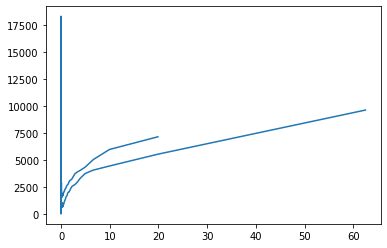

In [147]:
data = abs(np.fft.ifft(fft))
time = abs(np.fft.ifft(freq))
plt.plot(time,data)